# k Means

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The aim of cluster analysis is to create a grouping of objects such that objects within
a group are similar and objects in different groups are not similar. There are many
ways of defining what it means for two objects to be similar and many ways of
performing the grouping once similarity is defined.

partition into k, calculate means, iteratively partitition and work out hwere the ideal means should be


The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

The k-means algorithm divides a set of
samples into disjoint clusters , each described by the mean
of the samples in the cluster. The means are commonly called the cluster “centroids”; note that they are not, in general, points from

, although they live in the same space.

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

Inertia can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:

    Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.

    Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.

K-means is often referred to as Lloyd’s algorithm. In basic terms, the algorithm has three steps. The first step chooses the initial centroids, with the most basic method being to choose samples from the dataset . After initialization, K-means consists of looping between the two other steps. The first step assigns each sample to its nearest centroid. The second step creates new centroids by taking the mean value of all of the samples assigned to each previous centroid. The difference between the old and the new centroids are computed and the algorithm repeats these last two steps until this value is less than a threshold. In other words, it repeats until the centroids do not move significantly.

Each object has to be
assigned to one, and only one cluster

We begin by considering the problem of identifying groups, or clusters, of data points
in a multidimensional space. Suppose we have a data set {x1, . . . , xN} consisting
of N observations of a random D-dimensional Euclidean variable x. Our goal is to
partition the data set into some number K of clusters


This is actually a known problem in KNN classification which stems from differences in density between classes. If one class is very common while another is relatively rare, KNN classification will be biased towards the former.

One common solution to this is to weigh data points by the inverse of their distance from the point being classified. This is analogous to giving points that are further away fewer shares of the vote in determining a certain point's class. 

K-means is an unsupervised learning technique. Often, data will be in the form of a dataset X of N obersvations, each with measurements in for D variables ($x \in \mathbb{R}^D \text{ for each } x \text{ in } \{x_1,...x_N\}$) and for which the class is not known beforehand. K-means works by splitting the dataset into a predetermined number (K) of disjoint clusters based on similarities between data points. The algorithm is based on the assumption that datapoints belonging to one class will be closer together in feature space than points in different classes.

Take for example the dataset in the plot below. It contains 50 datapoints, each drawn from 1 of 2 2-dimensional gaussian distributons. Geometrically, each data point can be thought of as a single point in d dimensional space.

In [2]:
cluster1 = np.random.multivariate_normal([1, 2], [[0.7, 0], [0, 0.7]], 25)
cluster2 = np.random.multivariate_normal([-1, -2], [[0.7, 0], [0, 0.7]], 25)
cluster3 = np.random.multivariate_normal([-3, 3], [[0.7, 0], [0, 0.7]], 25)

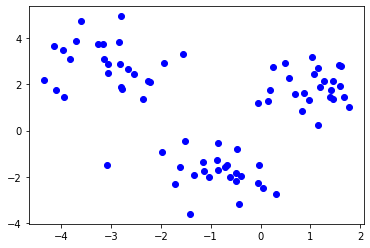

In [3]:
plt.scatter(cluster1[:,0],cluster1[:,1], c='b')
plt.scatter(cluster2[:,0],cluster2[:,1], c='b')
plt.scatter(cluster3[:,0],cluster3[:,1], c='b')

This fairly trivial example contains 3 distinct clusters of data which can easily be distinguished in 2d space. The strength of k-means is that is generalises well to an arbitrary number of dimensions

The goal of k means is to split the data into k clusters based on the features of each dataset. For k=3

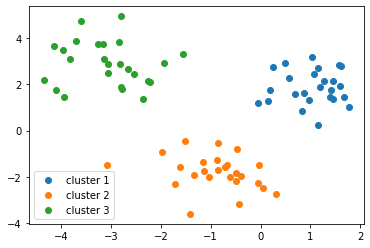

In [4]:
plt.scatter(cluster1[:,0],cluster1[:,1], label='cluster 1')
plt.scatter(cluster2[:,0],cluster2[:,1], label='cluster 2')
plt.scatter(cluster3[:,0],cluster3[:,1], label='cluster 3')
plt.legend()

In k-means, each cluster is described by its mean position in euclidian/feature space relative to all points assigned to that class. This position is generally referred to as a centroid (the geomentric mean of all points in all d-dimensions). The challenge that k means must solve is an optimisation problem of where in the feature space does each centroid lie.

As with most ML algorithms, there are a number of choices for optimisation metrics and a number of variations to the algorithm itself. The simplest and most common apprach is usually a good starting point. In kmeans, centroids are chosen to minimise the inertia, or within-cluster sum-of-squares criterion:

$$\sum^N_{i=0}(\lvert\lvert x_i-u_j\rvert\rvert^2)$$

where $u_j$ describes the centroid and $x$ all points assigned to that centroid class.

The centroid of each cluster is defined as the geometric mean position of all points belonging to that cluster but in unsupervised learning, class labels are not known beforehand. Kmeans produces class labels by assigning each data point to the geometrically closest (or some other chosen metric) centroid thereby creating clusters of similar (in feature space) data points. This creates a problem - centroids are defined by clusters which are defined by centroids - which k means solves by an iterative approach.

The first step is to choose the number of clusters (k) to partition the data into. k will remain fixed throughout. This is usually based on some domain knowledge, but can involve an amount of trial and error based on inights gained during the clustering assignment.

The centroids must then be initialised. This can be done by choosing k points from the dataset and using their values as the centroid position, or by manually selecting the initial starting points based on some domain knowledge, but the most appropriate starting point is usually one which is chosen randomly and independently for each of the k centroids.

Given k points, k-means will iteratively adjust the position of each centroid according to:

1. For each point $x$ in dataset $X$, assign it to its closest centroid
2. Calculate the mean posistion of all points in each class and move each centroid towards its corresponding class mean
3. repeat until some condition is met

Typical conditions may be a set number of iterations, a threshold number of points changing class after an iteration or a $(x-u)^2$ threshold.

The k-means algorithm optimises towards a local minima which can be dependent on the initialisation of the centroids. It is therefore often necessary to repeat the algorithm in its entirety multiple times ....

## example: iris classification

The iris dataset contains four measurements (sepal length, sepal width, petal length and petal width) from 3 different species of iris flower (setosa, versicolor, virginica). In this case the labels are provided but kmeans operates on unlabelled data. The labels will be useful for evaluating the clustering.

In [5]:
from sklearn.datasets import load_iris

In [6]:
iris = load_iris()
data = iris['data']

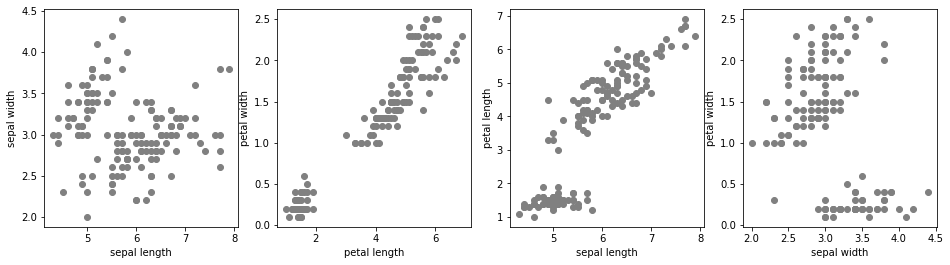

In [7]:
fig, ax = plt.subplots(1,4, figsize=(16,4))
ax[0].scatter(data[:, 0], data[:, 1], c='grey')
ax[0].set_xlabel("sepal length")
ax[0].set_ylabel("sepal width")

ax[1].scatter(data[:, 2], data[:, 3], c='grey')
ax[1].set_xlabel("petal length")
ax[1].set_ylabel("petal width")

ax[2].scatter(data[:, 0], data[:, 2], c='grey')
ax[2].set_xlabel("sepal length")
ax[2].set_ylabel("petal length")

ax[3].scatter(data[:, 1], data[:, 3], c='grey')
ax[3].set_xlabel("sepal width")
ax[3].set_ylabel("petal width")

plt.show()

#### Step 1: set k
since we already know the dataset contains 3 classes, use $k=3$

In [8]:
k = 3

#### Step 2: initialise the centroids

centroids will be initialised randomly. it makes sense to define a range of reasonable values for the starting points. these will be the range of values in each dimension

In [9]:
n_dim = 4 # the number of features
centroids = np.random.uniform(np.min(data, axis=0), np.max(data, axis=0), (k,n_dim))
centroids

array([[5.02862019, 3.87681388, 4.7285364 , 1.31287686],
       [6.40909679, 3.82102078, 4.90388747, 0.93550655],
       [7.18432012, 2.13607756, 4.85001321, 2.36514894]])

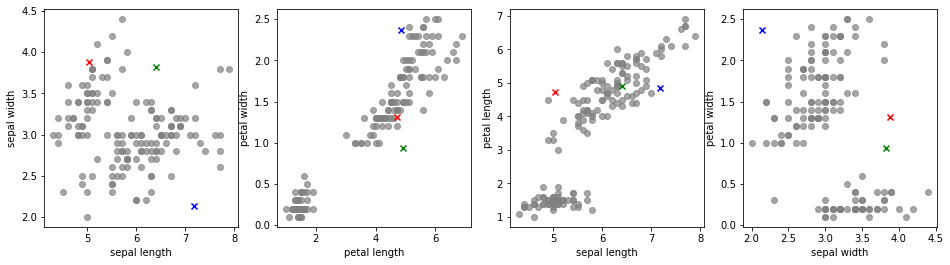

In [10]:
fig, ax = plt.subplots(1,4, figsize=(16,4))
ax[0].scatter(data[:, 0], data[:, 1], c='grey', alpha=0.7)
ax[0].set_xlabel("sepal length")
ax[0].set_ylabel("sepal width")
for centroid, colour in zip(centroids, ['r', 'g', 'b']):
    ax[0].scatter(centroid[0], centroid[1], c=colour, marker='x')

ax[1].scatter(data[:, 2], data[:, 3], c='grey', alpha=0.7)
ax[1].set_xlabel("petal length")
ax[1].set_ylabel("petal width")
for centroid, colour in zip(centroids, ['r', 'g', 'b']):
    ax[1].scatter(centroid[2], centroid[3], c=colour, marker='x')

ax[2].scatter(data[:, 0], data[:, 2], c='grey', alpha=0.7)
ax[2].set_xlabel("sepal length")
ax[2].set_ylabel("petal length")
for centroid, colour in zip(centroids, ['r', 'g', 'b']):
    ax[2].scatter(centroid[0], centroid[2], c=colour, marker='x')

ax[3].scatter(data[:, 1], data[:, 3], c='grey', alpha=0.7)
ax[3].set_xlabel("sepal width")
ax[3].set_ylabel("petal width")
for centroid, colour in zip(centroids, ['r', 'g', 'b']):
    ax[3].scatter(centroid[1], centroid[3], c=colour, marker='x')

plt.show()

#### Step 3: calculate $\sum(x-u_i)^2$ for each cluster then assign points

In [11]:
classes = np.argmin([np.sum((data - centroids[i])**2, axis=1) for i in range(k)], axis=0)

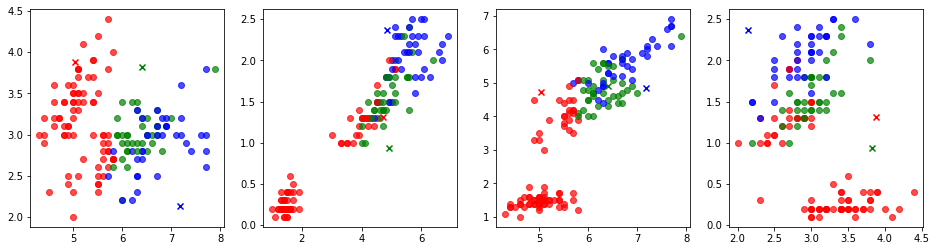

In [12]:
fig, ax = plt.subplots(1,4, figsize=(16,4))
colours = ['r', 'g', 'b']
for i, c in enumerate([[0, 1], [2, 3], [0, 2], [1, 3]]):
    for j, point in enumerate(data):
        ax[i].scatter(point[[c[0]]], point[c[1]], c=colours[classes[j]], alpha=0.7)
    for centroid, colour in zip(centroids, colours):
        ax[i].scatter(centroid[[c[0]]], centroid[[c[1]]], c=colour, marker='x')

#### Step 4: move centroids towards their class mean

In [13]:
learning_rate = 1.0 # here we will just move the cenroids to the exact location of their mean
old_centroids = centroids.copy()
for i in range(k):
    new_centroid = np.mean(data[classes==i], axis=0)
    norm = new_centroid - centroids[i]
    centroids[i] = (learning_rate*norm) + centroids[i]

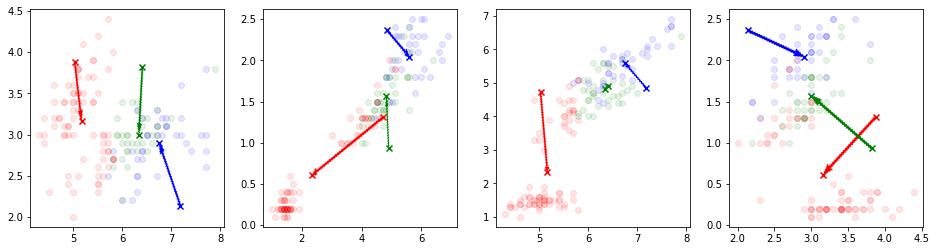

In [14]:
fig, ax = plt.subplots(1,4, figsize=(16,4))
colours = ['r', 'g', 'b']
for i, c in enumerate([[0, 1], [2, 3], [0, 2], [1, 3]]):
    for j, point in enumerate(data):
        ax[i].scatter(point[[c[0]]], point[c[1]], c=colours[classes[j]], alpha=0.1)
    for old, new, colour in zip(old_centroids, centroids, colours):
        old = (*old[[c[0]]], *old[[c[1]]])
        new = (*new[[c[0]]], *new[[c[1]]])
        ax[i].scatter(old[0], old[1], c=colour, marker='x')
        ax[i].arrow(old[0], old[1], new[0]-old[0], new[1]-old[1], color=colour, linestyle=':', width=0.03, length_includes_head=True) 
        ax[i].scatter(new[0], new[1], c=colour, marker='x')

#### reassign points

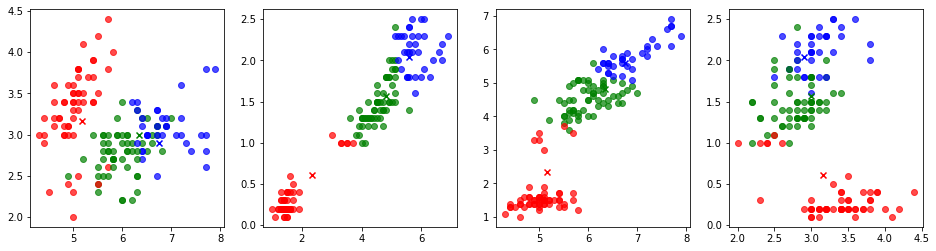

In [15]:
classes = np.argmin([np.sum((data - centroids[i])**2, axis=1) for i in range(k)], axis=0)
fig, ax = plt.subplots(1,4, figsize=(16,4))
colours = ['r', 'g', 'b']
for i, c in enumerate([[0, 1], [2, 3], [0, 2], [1, 3]]):
    for j, point in enumerate(data):
        ax[i].scatter(point[[c[0]]], point[c[1]], c=colours[classes[j]], alpha=0.7)
    for centroid, colour in zip(centroids, colours):
        ax[i].scatter(centroid[[c[0]]], centroid[[c[1]]], c=colour, marker='x')

#### Repeat

In [16]:
for i in range(10):
    for i in range(k):
        new_centroid = np.mean(data[classes==i], axis=0)
        norm = new_centroid - centroids[i]
        centroids[i] = (learning_rate*norm) + centroids[i]
    classes = np.argmin([np.sum((data - centroids[i])**2, axis=1) for i in range(k)], axis=0)

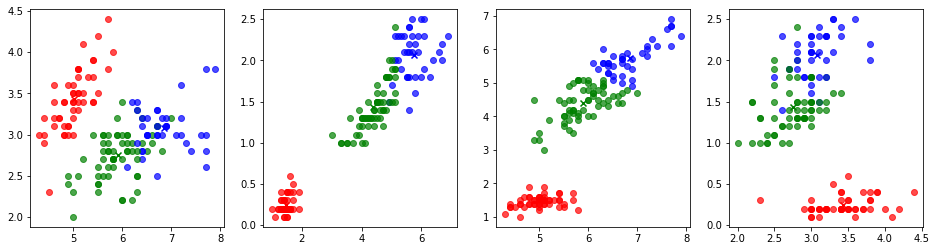

In [17]:
fig, ax = plt.subplots(1,4, figsize=(16,4))
colours = ['r', 'g', 'b']
for i, c in enumerate([[0, 1], [2, 3], [0, 2], [1, 3]]):
    for j, point in enumerate(data):
        ax[i].scatter(point[[c[0]]], point[c[1]], c=colours[classes[j]], alpha=0.7)
    for centroid, colour in zip(centroids, colours):
        ax[i].scatter(centroid[[c[0]]], centroid[[c[1]]], c=colour, marker='x')

In [18]:
# need to work put which or our arbitrarily assigned classes corresponds to the labels
acc = -1
for i in range(1, k):
    a = (classes == iris['target']).mean()
    acc = max(a, acc)
    classes = classes + 1
    classes[classes==3] = 0
print(f"accuracy: {acc*100:.1f}%")

accuracy: 89.3%


not bad

# Clustering proteins

the data in proteins.json contains 1090 medium length protein sequences (150-250aa) from 4 species (a. niger, h.sapiens, s. salar, t. aestivum). Each amino acid can be one of 21 amino acids. Amino acid counts will be used to attempt to cluster proteins.

In [19]:
import json

with open('data/protein.json') as f:
    data = json.load(f)

aa = data['aa'] # the list of amino acids

# vectorise a sequence to its amino acid count
def vectorise(seq):
    vector = [0]*21
    for s in seq:
        vector[aa.index(s)] += 1
    return vector

In [20]:
sequences = data['sequences']

print(sequences[0], "\n")

sequences = np.array([vectorise(v) for v in sequences])
print(sequences[0])

MSEVAFIKSFLSSLDSRPIKLRADYVLDEERVGPRVPYLLPRLSAPHPEMPKKVQRTQAPGSSKSITVHVKSARNPAFEFTLPNAPITTTSVQDLKDAVQERVVDAQDGKVSLEKIKILYKRKPVTGKTIAELLADEPEMLAGGKEVEFGVMIMGGAKVVEGGEGGGNAAAAAAAGGAPKAAVGPSGEEVLRTEAFWDDLQGFLEQRLKDSEEARRLRGVFKGAWEKQ 

[21  3 19  2  9 14 14 21 15  8 20 26  3  0  8  5  0 19  8 11  2]


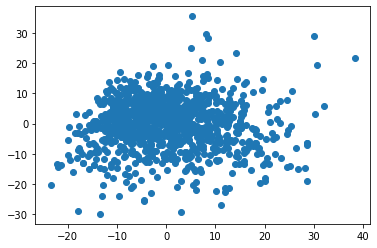

In [21]:
from sklearn.decomposition import PCA
pca = PCA()
reduced = pca.fit_transform(sequences)
plt.scatter(reduced[:,0], reduced[:,1])
plt.show()

Obviously this is a little trickier

In [22]:
k = 4
n_dim = 21 # the number of amino acids
centroids = np.random.uniform(np.min(sequences, axis=0), np.max(sequences, axis=0), (k,n_dim))
classes = np.argmin([np.sum((sequences - centroids[i])**2, axis=1) for i in range(k)], axis=0)

In [23]:
# start by setting k=4; the number of species
# alternative (and probably better) clusterings may be protein type (GPCR, protease, chaperone, etc)

k = 4
n_dim = 21 # the number of amino acids
centroids = np.random.uniform(np.min(sequences, axis=0), np.max(sequences, axis=0), (k,n_dim))
classes = np.argmin([np.sum((sequences - centroids[i])**2, axis=1) for i in range(k)], axis=0)

learning_rate=1.0
for i in range(10):
    for i in range(k):
        new_centroid = np.mean(sequences[classes==i], axis=0)
        norm = new_centroid - centroids[i]
        centroids[i] = (learning_rate*norm) + centroids[i]
    classes = np.argmin([np.sum((sequences - centroids[i])**2, axis=1) for i in range(k)], axis=0)
    

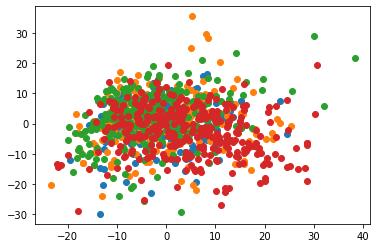

In [24]:
s = np.array(data['species'])
for i in range(4):
    x = reduced[s == i]
    plt.scatter(x[:,0], x[:,1])
plt.show()

In [25]:
names = np.array(data['names'])
for i in range(4):
    print(f"proteins in cluster {i}\n{'-'*100}")
    for j in range(5):
        j = classes == i
        k = np.random.randint(0, j.sum())
        
        print(f"{data['labels'][s[j][k]]:11}  :  {names[j][k]}")
    print()

proteins in cluster 0
----------------------------------------------------------------------------------------------------
h.sapiens    :  Amelogenin, X isoform
s. salar     :  extensin-like
s. salar     :  vegetative cell wall protein gp1-like
t. aestivum  :  Uncharacterized protein
t. aestivum  :  Uncharacterized protein

proteins in cluster 1
----------------------------------------------------------------------------------------------------
s. salar     :  XK-related protein
t. aestivum  :  Uncharacterized protein
t. aestivum  :  Uncharacterized protein
t. aestivum  :  AP2/ERF domain-containing protein
a. niger     :  Toxin biosynthesis ketoreductase

proteins in cluster 2
----------------------------------------------------------------------------------------------------
a. niger     :  Similar to An01g06790
t. aestivum  :  Ribosomal_L2_C domain-containing protein
t. aestivum  :  FLZ-type domain-containing protein
s. salar     :  Smith-Magenis syndrome chromosomal region candidate

k-means works best with linearly seperable, normally distributed, evenly distributed and evenly sized clusters. That is quite a few assumtions which of course are often not true.